## Data set description

The dataset used is Abalone Data set. 

In this task with the dataset, the age of the abalone should be predicted with the physical measurements. In general, the age is determined by cutting the shell through the cone, staining after that, and counting the number of rings present through the microscope.

This dataset has 4177 instances. There are no missing values in this data set as per the description given. The missing values are already removed from the original samples and the ranges of continuous values are scaled with ANN.

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
921,I,0.420,0.32,0.115,0.3760,0.1690,0.0920,0.100,5
2352,M,0.700,0.53,0.190,1.3185,0.5480,0.2330,0.420,18
2944,M,0.630,0.51,0.170,1.1885,0.4915,0.3065,0.348,7
3880,I,0.380,0.30,0.100,0.2860,0.1305,0.0560,0.090,7
3966,I,0.295,0.22,0.065,0.1295,0.0520,0.0280,0.035,6


In [5]:
df.shape

(4177, 9)

There are 4177 rows and 9 columns in this dataset

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## Attributes

There are 9 attributes. These attributes are the columns of the data set. The age column is not included in the dataset. But in the description it is given that age = Rings + 1.5.

Sex – The data type is categorical and there are three types in this data. M, F and I.

Length – It is the continuous datatype and the units are in mm. It is the longest shell measurement.

Diameter – It is also continuous datatype and the units are in mm. It is the perpendicular to length.

Height – It is a continuous data type. It is numerical just like diameter and length. Its units are in mm and it is the meat in the shell.

Whole weight – A continuous data measured in grams. It is the weight of whole abalone.

Shucked weight – It is same as whole weight, continuous data, measured in grams and it is the weight of the meat.

Viscera weight – It is also continuous data, measured in grams and it is the git weight after bleeding.

Shell weight – It is the weight of the shell after being dried. It is continuously varying data.

Rings – It is an integer and adding 1.5 to rings gives the age of the abalone.

In [7]:
#Checking data type of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


We can see there are no null values in the variables. We have Rings variables having integer data type which is als Target.
Sex is object data type. Other variables are of float data tupe

## EDA

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values

<AxesSubplot:>

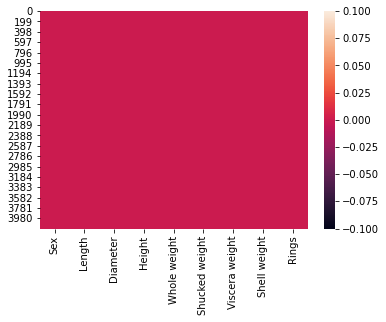

In [9]:
#To check missing values
sns.heatmap(df.isnull())

In [10]:
df['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

We can see that the target is 1 to 29 (but there is no 28), so the classification we are going to do is a multi-class classification

### Data Preprocessing

#### Dealing with missing values

We first check how many missing values are in the Height feature and which class is it in.

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The minimum value in height is zero. There are some zero values in height feature so checking the 'height' feature.



In [12]:
df['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [13]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


The number of missing values is 2 and is in the infant sex. Then we change the value 0 to null. We will fill in the missing value with the average Height feature for the infant gender

In [14]:
means=pd.pivot_table(df,index=['Sex'],aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


Mean value of infant sex values is 0.107996.So we will fill in the missing value with 0.107996

In [15]:
df['Height']=df['Height'].replace(to_replace=0,value=0.107996)

In [16]:
#Checking the height minimum values again
df['Height'].describe()

count    4177.000000
mean        0.139568
std         0.041721
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [17]:
# Since'Sex' Are of categorical dtype. So we are applying Label Encoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [18]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Observation

1.> Sex column has been encoded and values have been changed to int ( Infant =0 , male = 1, female =3)

2.> Now all the columns are of type integer or float

In [19]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139568,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041721,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Univariate Analysis

<AxesSubplot:xlabel='Rings', ylabel='Density'>

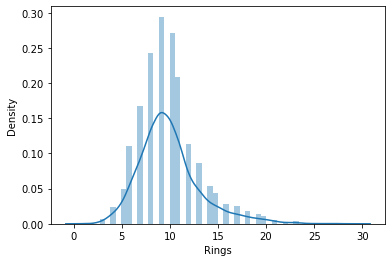

In [20]:
# Target feature distribution 
sns.distplot(df["Rings"])

Observation

it is target variable and looking at the distribution it seems that maximum abalone rings falls between 7 to 15 numbers. 
Since age = Rings+1.5, maximum abalone'age fall under 7 to 15 age group.

<AxesSubplot:xlabel='Sex', ylabel='count'>

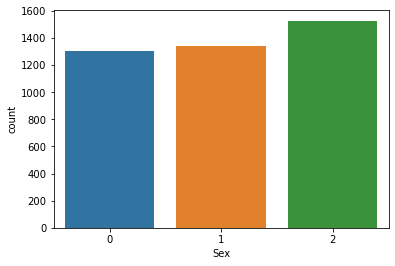

In [21]:
#we have one categorical variable. ('Sex')
#plotting to check how many categories for 'Sex' variable
sns.countplot(df.Sex)

In [22]:
# 0 = Infant
# 1 = Male
# 2 = female
print(df["Sex"].value_counts())

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


Observation

Data is almost equally distributed in all 3 sex columns category, which shows that it is not inclide to one particular gender. 

#Let's consider relation between ['Sex'] and ['Rings'] 
#### Plot for relation between sex and rings

<AxesSubplot:xlabel='Sex'>

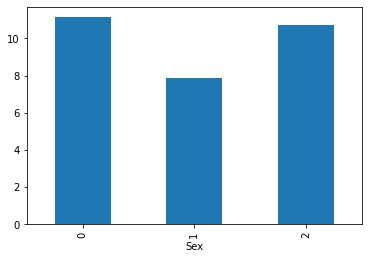

In [23]:
df.groupby(["Sex"])["Rings"].mean().plot(kind="bar")   # 0 = Infant  1 = Male  2 = female

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

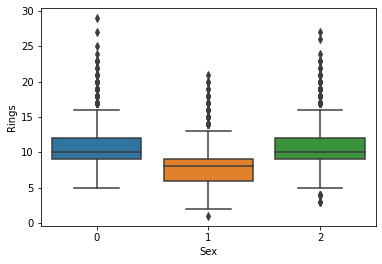

In [24]:
import seaborn as sns
sns.boxplot(x='Sex', y='Rings', data=df)    # 0 = Infant  1 = Male  2 = female

Conclusion : ‘sex’ has an influence on distribution of ‘Rings’. Female sex has more number of rings than male sex.Infant has least number of Rings.

### Checking The Correlation

In [25]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042264,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.828091,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.834265,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042264,0.828091,0.834265,1.000000,0.819916,0.775670,0.798951,0.819359,0.557755
Whole weight,-0.021391,0.925261,0.925452,0.819916,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.775670,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798951,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.819359,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557755,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

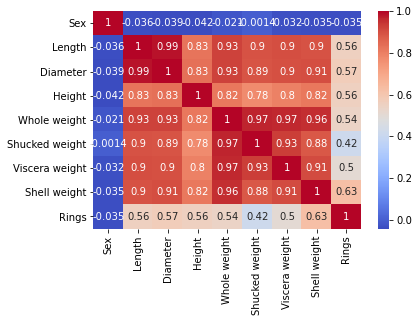

In [26]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

CONCLUSION:

1.Shell Weight is maximum correlated with the target['Rings']. All the other variables also have very good correlation with the target.

2.'sex' is negativly correlated with the target.

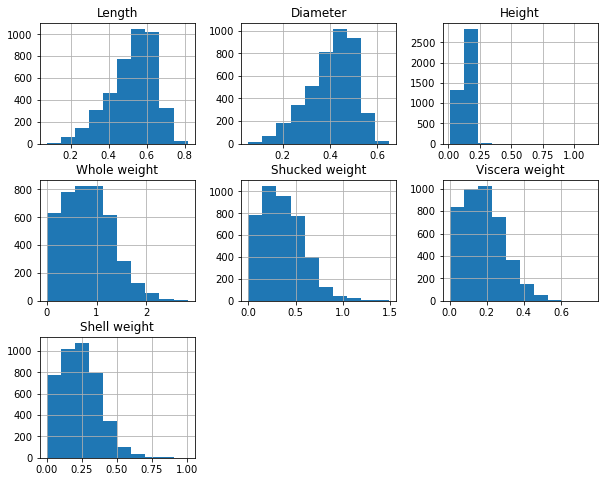

In [27]:
# distribution of the data
df.iloc[:,1:-1].hist(figsize=(10,8));

Observation Length, Diameter and height are left skewed and whole weight,shucked weight, viscera weight and shell weight are right skewed.

 ### Let's check the data distribution among all the columns.

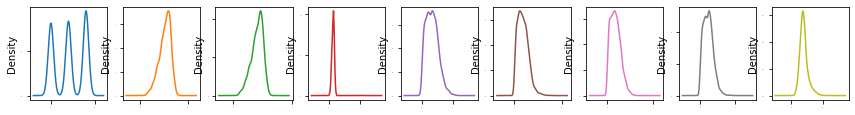

In [28]:
df.plot(kind='density',subplots=True, layout=(6,11), sharex=False, legend= False, fontsize=1, figsize=(18,12))
plt.show()

From the above grtaphs we see the data is not much skewed other than 1st one which is for sex column and it has 3 categories.

### Splitting the independant and target variables in x and y before removing the skewness

In [29]:
x=df.drop('Rings', axis=1)
y=df['Rings']
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [30]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [31]:
# Cheking Skewness
x.skew().sort_values(ascending=False)

Height            3.166698
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
Length           -0.639873
dtype: float64

We can see we have skewness in 'Height'. So we will remove skewness using power_transformation.

In [32]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [33]:
type(x_new)

numpy.ndarray

In [34]:
x.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [35]:
x=pd.DataFrame(x_new, columns=x.columns)

In [36]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.127072,-0.685502,-0.549860,-1.130946,-0.576766,-0.540989,-0.693283,-0.587809
1,1.127072,-1.396344,-1.387333,-1.271791,-1.351761,-1.311662,-1.332953,-1.332420
2,-1.307935,-0.070774,0.008537,-0.065468,-0.198099,-0.366116,-0.255135,-0.098262
3,1.127072,-0.797286,-0.549860,-0.322021,-0.571893,-0.591672,-0.547782,-0.544931
4,-0.009459,-1.513796,-1.459659,-1.558919,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.667866,0.241948,0.194158,0.639623,0.193008
4173,1.127072,0.492813,0.230611,-0.065468,0.395706,0.495450,0.433568,0.275215
4174,1.127072,0.593366,0.645191,1.567887,0.777944,0.838137,1.015607,0.598398
4175,-1.307935,0.853375,0.769928,0.307824,0.633874,0.858739,0.815184,0.519145


In [37]:
# Again Cheking Skewness if it has been removed 
x.skew().sort_values(ascending=False)

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.113615
Sex              -0.176442
dtype: float64

In [38]:
sk=x.skew()
sk

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.113615
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [39]:
x.skew()[np.abs(x.skew())<0.25].all()

True

### Outliers check

Sex                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Length            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Diameter           AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Height            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Whole weight      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.133621x0.343182)
Viscera weight       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Shell weight          AxesSubplot(0.44569,0.125;0.133621x0.343182)
Rings                AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

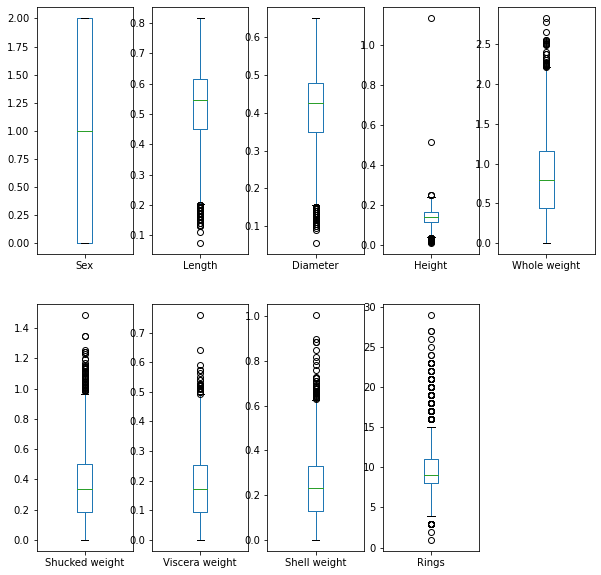

In [40]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

Here we can see there are so many outliers in ['Length'],['Diameter'],['Whole weight'], ['Shucked weight'],["Viscera weight"], ['Shell weight'] and ['Rings']

### Removing Outliers

In [41]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [42]:
z.shape

(4177, 9)

In [43]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108, 2108,
       2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381, 2436,
       2459, 2471, 2544, 2623, 2624, 2624, 2624, 2

In [44]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
print(df.shape)
print(df_new.shape)

(4177, 9)
(4029, 9)


#### Percentage Data Loss

In [46]:
loss_percent=(4177-4029)/4177*100
print(loss_percent)

3.5432128321762026


3.5% of data is lost approximately while removing outliers

## Model Without Outliers

### Separating columns into Features and Target

In [47]:
x=df_new.iloc[:, :-1]
y=df_new.iloc[:,-1]

In [48]:
x.shape

(4029, 8)

In [49]:
y.shape

(4029,)

In [50]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.16001565, -0.56860689, -0.41955773, ..., -0.60317574,
        -0.72241757, -0.63069126],
       [ 1.16001565, -1.47439758, -1.46217669, ..., -1.20881734,
        -1.23041555, -1.25608841],
       [-1.28566883,  0.07838645,  0.15388269, ..., -0.44813149,
        -0.33053341, -0.16164339],
       ...,
       [ 1.16001565,  0.68224691,  0.72732312, ...,  0.85520923,
         1.08218478,  0.60446812],
       [-1.28566883,  0.89791136,  0.83158501, ...,  0.88185746,
         0.82576675,  0.51065855],
       [ 1.16001565,  1.63117048,  1.56141828, ...,  2.89016501,
         1.94336231,  2.06633396]])

In [51]:
# seprating data into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state =150)  
# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3223, 8)
Shape of x_test : (806, 8)
Shape of y_train : (3223,)
Shape of y_test : (806,)


## Training with different Models

In [52]:
# taking all models in a list
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVR(),RandomForestClassifier(),GaussianNB()]

# running loop for differents model\
for model in models:
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    MSE = mean_squared_error(pred,y_test)
    
    print("Mean_squared_error",model,MSE)
    print("RMSE",model, np.sqrt(MSE) )
    print("r_score",model,r2_score(y_test,pred)*100)
    print("\n")

Mean_squared_error LogisticRegression() 5.186104218362283
RMSE LogisticRegression() 2.2773019602947437
r_score LogisticRegression() 38.73247056491539


Mean_squared_error KNeighborsClassifier() 6.993796526054591
RMSE KNeighborsClassifier() 2.644578704832698
r_score KNeighborsClassifier() 17.376779084791405


Mean_squared_error DecisionTreeClassifier() 6.437965260545906
RMSE DecisionTreeClassifier() 2.537314576584052
r_score DecisionTreeClassifier() 23.94325113907798


Mean_squared_error SVR() 3.8632401912402514
RMSE SVR() 1.9655127044209741
r_score SVR() 54.360504115291654


Mean_squared_error RandomForestClassifier() 5.352357320099256
RMSE RandomForestClassifier() 2.3135162242999843
r_score RandomForestClassifier() 36.76839187010646


Mean_squared_error GaussianNB() 7.349875930521092
RMSE GaussianNB() 2.7110654603902673
r_score GaussianNB() 13.170132925014066




## Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
for model in models:
    score=cross_val_score(model,x,y,cv=3)
    print('CV score for',model)
    print(score)
    print(score.mean())
    print(score.std())
    print('\n')

CV score for LogisticRegression()
[0.26284438 0.27997022 0.28518243]
0.27599900719781584
0.009542011807764256


CV score for KNeighborsClassifier()
[0.2271035  0.2285927  0.23976173]
0.231819310002482
0.005648948462020861


CV score for DecisionTreeClassifier()
[0.18615041 0.21295607 0.19880864]
0.19930503847108463
0.010948992305839057


CV score for SVR()
[0.49544372 0.55521623 0.53404183]
0.5282339277050607
0.024745198048522654


CV score for RandomForestClassifier()
[0.23976173 0.25241996 0.27848101]
0.2568875651526433
0.01611966530764906


CV score for GaussianNB()
[0.20997766 0.26358898 0.25614296]
0.24323653512037724
0.023713220972938556




We are getting best r_score in SVR model. Also the difference for score of cross validation and model testing in SVR model is least. So selecting SVR model to train the data.

### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
#Creating parameter list to pass in GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.438 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.422 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.365 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.402 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.406 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.472 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.476 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.393 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.426 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.433 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.380 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

score 0.5483784998554044
best parameter {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best estimator SVR(C=10, gamma=0.1)


observation

since we have selected SVR as the final for model, we have applied randomized search CV for hypertuning and trained model with best parameters
Basis on the best paramater, we have used cross_validation
cross validaion with 3 iteration it gives best score ( mean with 0.0247 standard deviation)
saving the model with this

In [59]:
#Predict the Rings
pred=grid.predict(x_test)
print('Predicted number of Rings',pred)
print('Actual Number of Rings',y_test)


Predicted number of Rings [10.94497058  9.03218823  9.84929874 10.0042146  10.2569967   6.42027099
  7.57366343  6.10606528  9.6472628   7.92590713 10.29332069 11.02802579
  6.56052812 10.50588324  9.70164531  9.39036503 11.10646136  9.937948
  6.48514827  9.91488775  9.7037102   9.34800014  7.47917468  9.9513974
  9.75011421  8.51209543 12.45718162 12.1741288  15.00345702  6.79257923
  9.01933083 12.34154405  7.15832442  4.60696072 10.71755889  3.91260191
 13.33892571 11.00968412 15.56058722  4.35748724 13.29563513  8.2594171
  8.68830479 10.19496901  9.07107035  9.05096029 13.12732524  9.81881495
  6.89466312 10.43915078  5.22276034  8.13823589  5.88937589 10.81771756
  9.39766313  8.30960399  7.39228864 13.6716516  11.33296092  9.04916331
  6.43040562 10.17214265  9.27160412  6.36760917  7.76732647 12.59169706
  9.89503583  8.09739519 11.56395576  7.7791843  10.64276976  6.75597833
 10.3769527  15.32066402 11.80205528 10.94476113  9.12640237 13.15908523
  9.99924777  7.57752394  7.2

In [60]:
import numpy as np
a=np.array(y_test)
Predicted=np.array(pred)
df_com=pd.DataFrame({'Original':a,'Predicted':Predicted},index=range(len(a)))
df_com

,Original,Predicted
0,13,10.944971
1,11,9.032188
2,8,9.849299
3,8,10.004215
4,10,10.256997
...,...,...
801,10,8.957093
802,17,12.641233
803,11,9.987957
804,9,11.208698


# Model Saving

In [61]:
import pickle
filename='Predicted_Rings.pkl'
pickle.dump(SVR,open(filename,'wb'))